In [1]:
!pip install scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr 

In [3]:
bike_data = pd.read_csv("datasets_784323_1347976_day.csv",index_col=0)
bike_data.head(6)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606


In [5]:
bike_data.shape

(731, 15)

In [6]:
bike_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [10]:
bike_data['dteday'] = pd.DatetimeIndex(bike_data['dteday'])
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.4 KB


In [11]:
np.corrcoef(bike_data['temp'],bike_data['cnt']) # correlation coefficient is a measure of statisical relationship that 
#exist btw 2 variables
# positively correlated (pearson)

array([[1.        , 0.62749401],
       [0.62749401, 1.        ]])

In [12]:
bike_data['temp'].corr(bike_data['cnt']) #pandas #above using numpy (pearson)

0.6274940090334918

In [13]:
# peaeson correlation : evaluates linear relation between 2 consecutives variable
pearsonr(bike_data['temp'],bike_data['cnt']) #p-value as well - tells us whether this correlation is significant or not

(0.627494009033492, 2.8106223975907754e-81)

In [15]:
#spearman correlation : based on the ranks of the variables rather than the actual values - usually used with ordinal data
spearmanr(bike_data['temp'],bike_data['cnt'])

SpearmanrResult(correlation=0.6220344732276183, pvalue=1.674554642260452e-79)

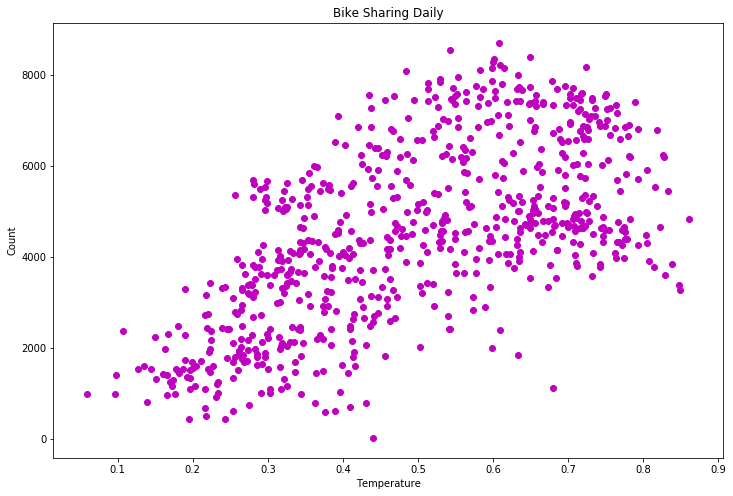

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(bike_data['temp'],bike_data['cnt'],color='m')
plt.title('Bike Sharing Daily')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()
# follows a linear relationship

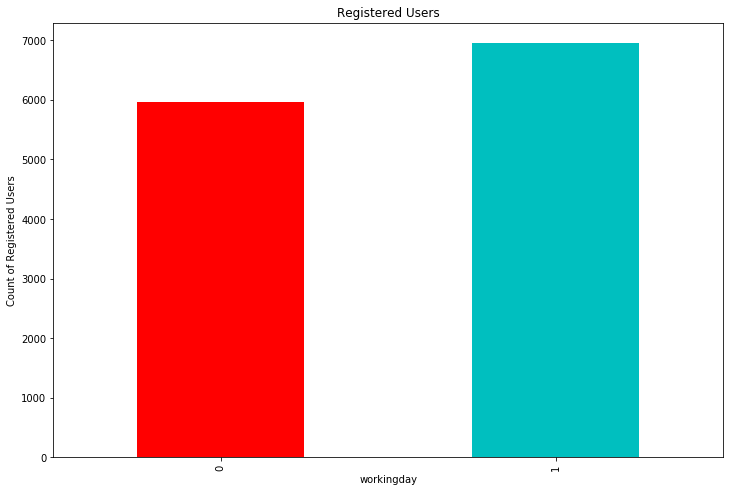

In [19]:
ax = plt.subplot()
bike_data.groupby('workingday').max()['registered'].plot(kind='bar',figsize=(12,8),ax=ax,color=['r','c'])
plt.title('Registered Users')
plt.ylabel('Count of Registered Users')
plt.show() #working day and non-working day

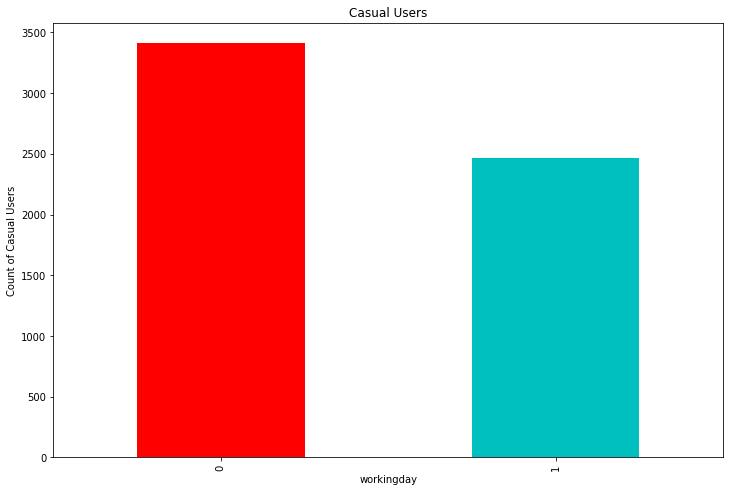

In [20]:
ax = plt.subplot()
bike_data.groupby('workingday').max()['casual'].plot(kind='bar',figsize=(12,8),ax=ax,color=['r','c'])
plt.title('Casual Users')
plt.ylabel('Count of Casual Users')
plt.show() #working day and non-working day

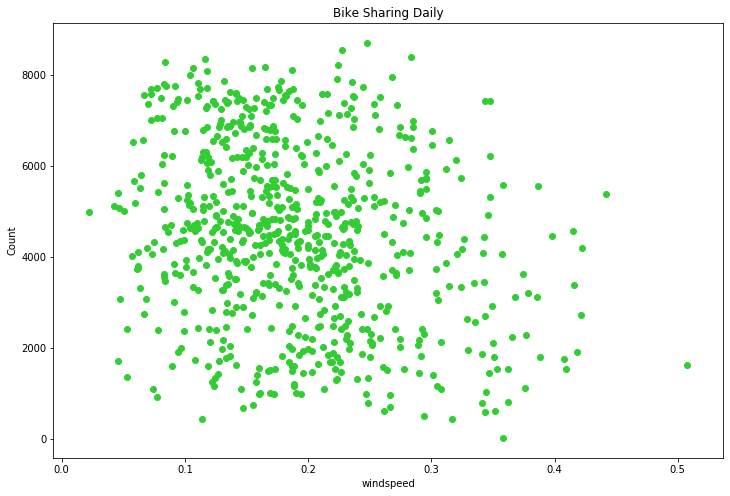

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(bike_data['windspeed'],bike_data['cnt'],color='limegreen')
plt.title('Bike Sharing Daily')
plt.xlabel('windspeed')
plt.ylabel('Count')
plt.show()

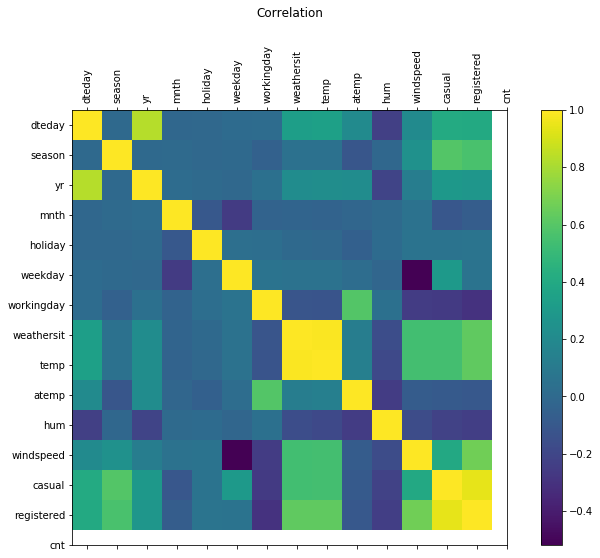

In [23]:
plt.figure(figsize=(12,8))
plt.matshow(bike_data.corr(),
           fignum = False,
           aspect='equal')
columns = len(bike_data.columns)
plt.xticks(range(columns),bike_data.columns)
plt.yticks(range(columns),bike_data.columns)
plt.colorbar()
plt.xticks(rotation=90)
plt.title("Correlation",y=1.2)
plt.show()

In [24]:
!pip install yellowbrick

In [25]:
target = bike_data['cnt'] #against which all correlation needs to be calculated
features = bike_data.drop(['casual','registered','cnt','dteday'],axis = 1)

In [26]:
from yellowbrick.target import FeatureCorrelation
feature_names = list(features.columns)
feature_names

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

C:\Users\A734917\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


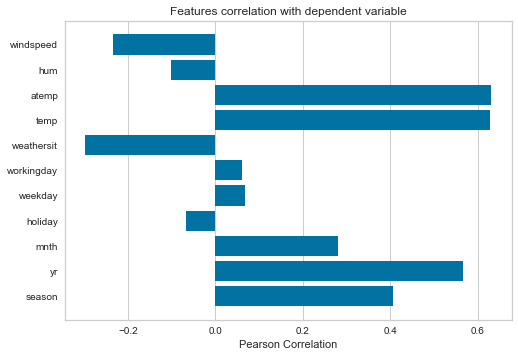

In [27]:
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(features,target)
visualizer.poof()

In [ ]:
# AutoCorrelation : Measures the relationship between a variables current value with its past value
# Auto = self

In [29]:
bike_data[['temp','hum']].describe()

,temp,hum
count,731.000000,731.000000
mean,0.495385,0.627894
std,0.183051,0.142429
min,0.059130,0.000000
25%,0.337083,0.520000
50%,0.498333,0.626667
75%,0.655417,0.730209
max,0.861667,0.972500


In [30]:
bike_data[['temp','hum']].corr()

,temp,hum
temp,1.000000,0.126963
hum,0.126963,1.000000


In [33]:
bike_data['temp'].autocorr(lag=102)

-0.2636392767717778

In [36]:
bike_data['hum'].autocorr(lag=2)

0.25443711081898696

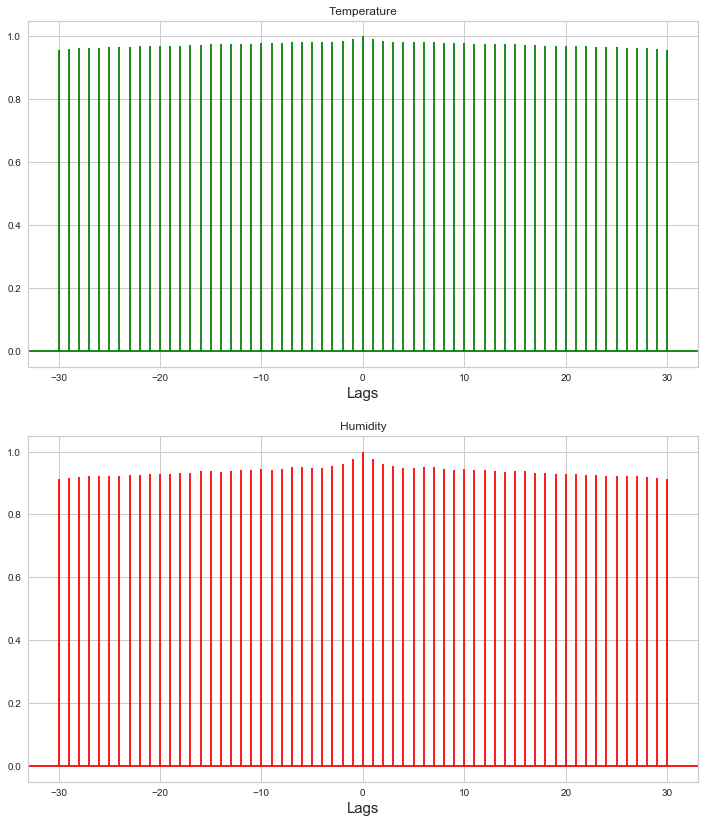

In [39]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,14))
ax1.acorr(bike_data['temp'],
         maxlags=30,color='green')
ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags',fontsize=15)

ax2.acorr(bike_data['hum'],
         maxlags=30,color='red')
ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags',fontsize=15)
plt.show()

In [40]:
bike_data['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                         ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],
                         inplace=True)
bike_data.sample(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
456,2012-03-31,2,1,Mar,0,6,0,2,0.424167,0.421708,0.738333,0.250617,2301,3934,6235
186,2011-07-05,3,0,Jul,0,2,1,1,0.746667,0.696338,0.590417,0.126258,1031,3634,4665
36,2011-02-05,1,0,Feb,0,6,0,2,0.233333,0.243058,0.929167,0.161079,100,905,1005


In [ ]:
# KDE Plots : Kernel Density Estimation Plot
# A mathematical technique to get a smooth probability distribution from a histogram of raw data
# Non-parametric smoothing technique

In [41]:
!pip install seaborn

In [42]:
import seaborn as sns

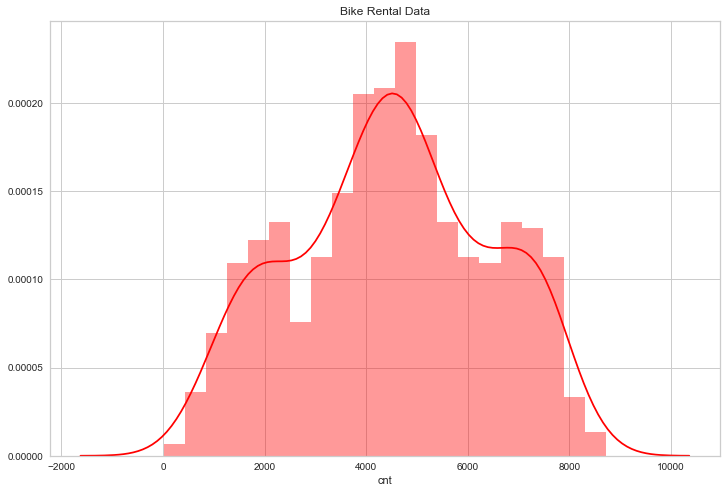

In [48]:
# Histogram is basically a frequency distribution
plt.figure(figsize=(12,8))
sns.distplot(bike_data['cnt'],bins=21,color='red')
plt.title('Bike Rental Data')
plt.show()

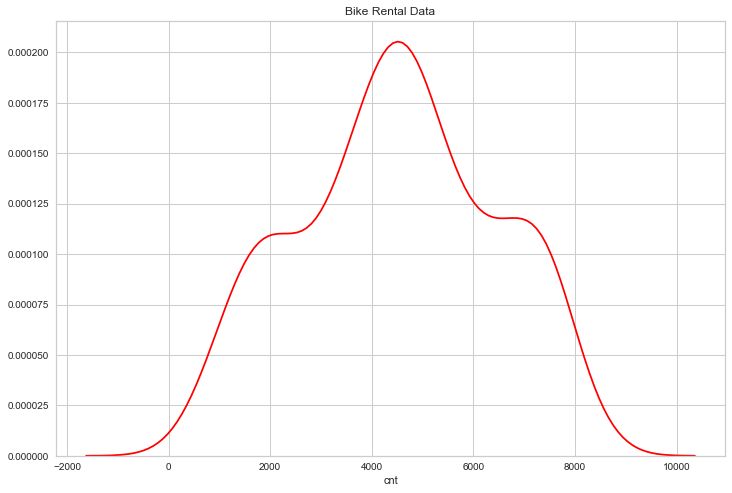

In [49]:
# only KDE curve no histogram
plt.figure(figsize=(12,8))
sns.distplot(bike_data['cnt'],hist=False,color='red')
plt.title("Bike Rental Data")
plt.show()

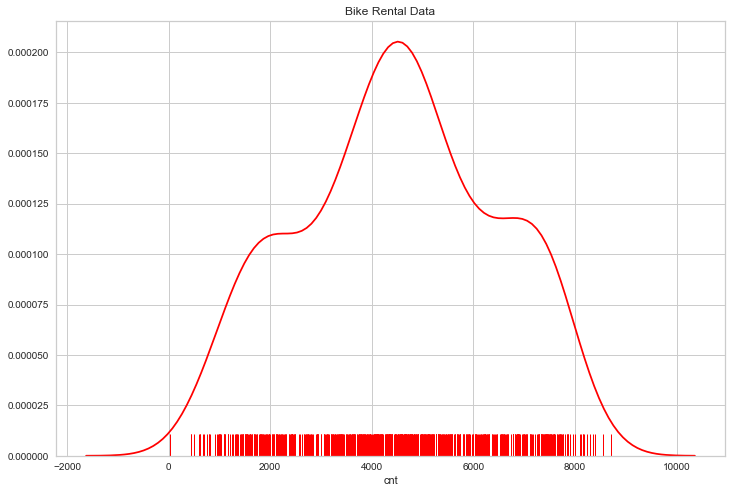

In [50]:
# rug plot = displays individual data points, represented by vertical line
plt.figure(figsize=(12,8))
sns.distplot(bike_data['cnt'],hist=False,rug=True,color='red')
plt.title("Bike Rental Data")
plt.show()

In [51]:
bike_data.sample(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
668,2012-10-29,4,1,Oct,0,1,1,3,0.440000,0.439400,0.880000,0.358200,2,20,22
309,2011-11-05,4,0,Nov,0,6,0,1,0.326667,0.323854,0.519167,0.189062,1156,2770,3926


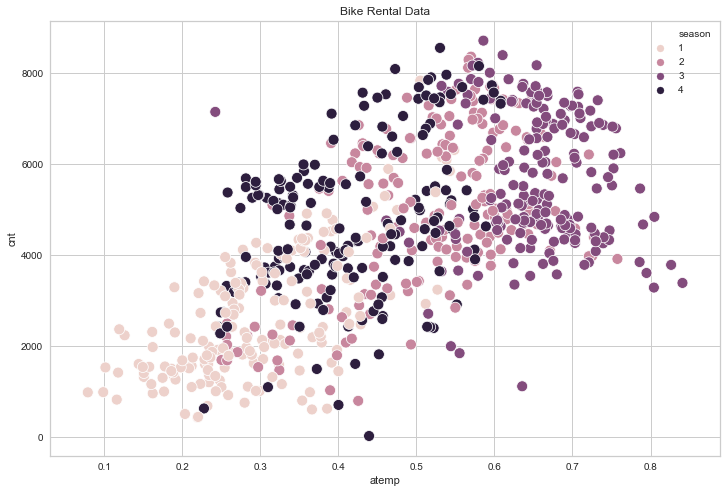

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='atemp',y='cnt',
               data=bike_data,
               hue='season',s=120)
plt.title('Bike Rental Data')
plt.show()

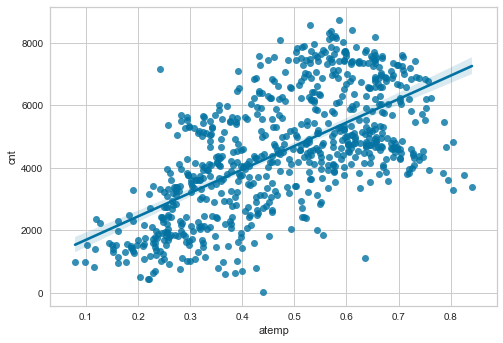

In [57]:
sns.regplot(x='atemp',y='cnt',data=bike_data)
plt.show()

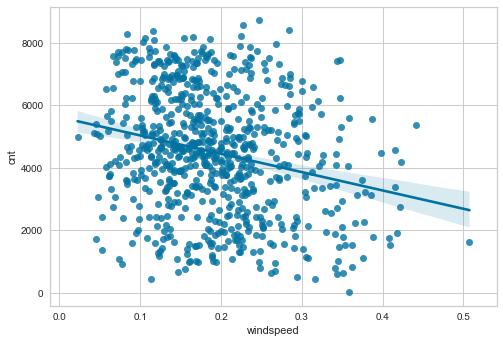

In [58]:
sns.regplot(x='windspeed',y='cnt',data=bike_data)
plt.show()

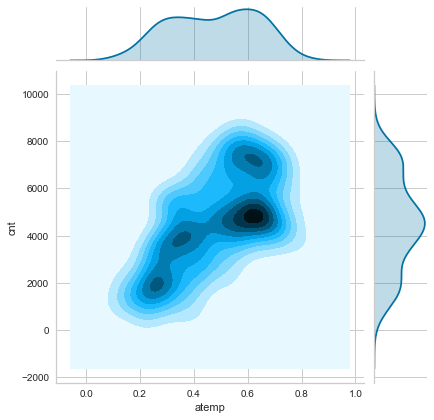

In [62]:
# univariate and bivariate distribution together
sns.jointplot(x='atemp',y='cnt',data=bike_data,kind='kde')
plt.show()

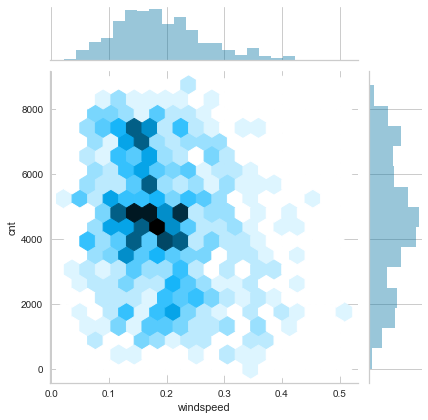

In [63]:
sns.jointplot(x='windspeed',y='cnt',data=bike_data,kind='hex')
plt.show()

In [ ]:
#catplot,boxplot,swarmplot,barplot,stripplot - categorical values and continuous variable - scatterplot

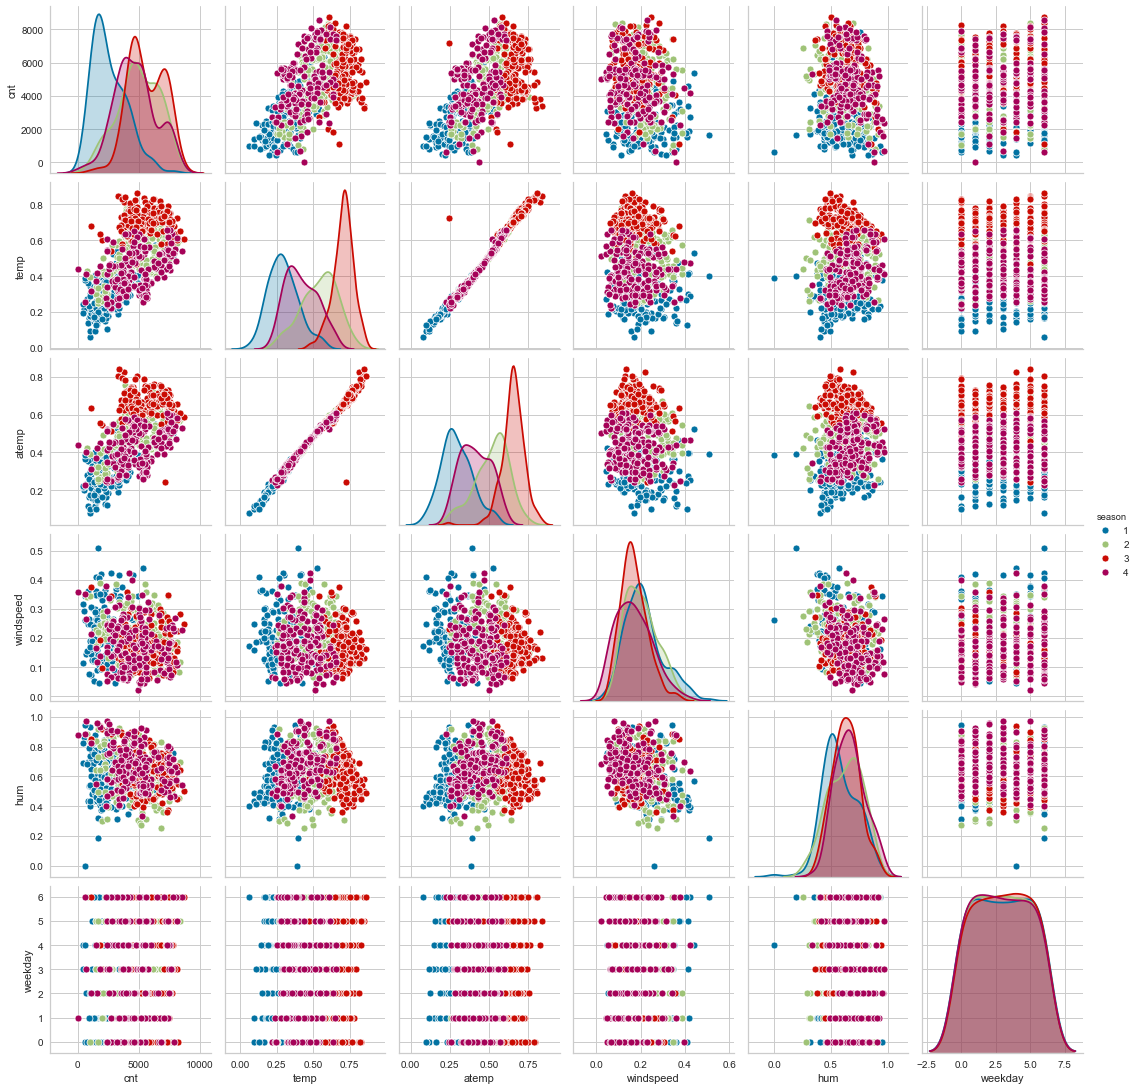

In [67]:
# pairGrid for granular representation and customization of viz.
sns.pairplot(bike_data,
            vars=['cnt','temp','atemp','windspeed','hum','weekday'],
            hue='season')
plt.show()

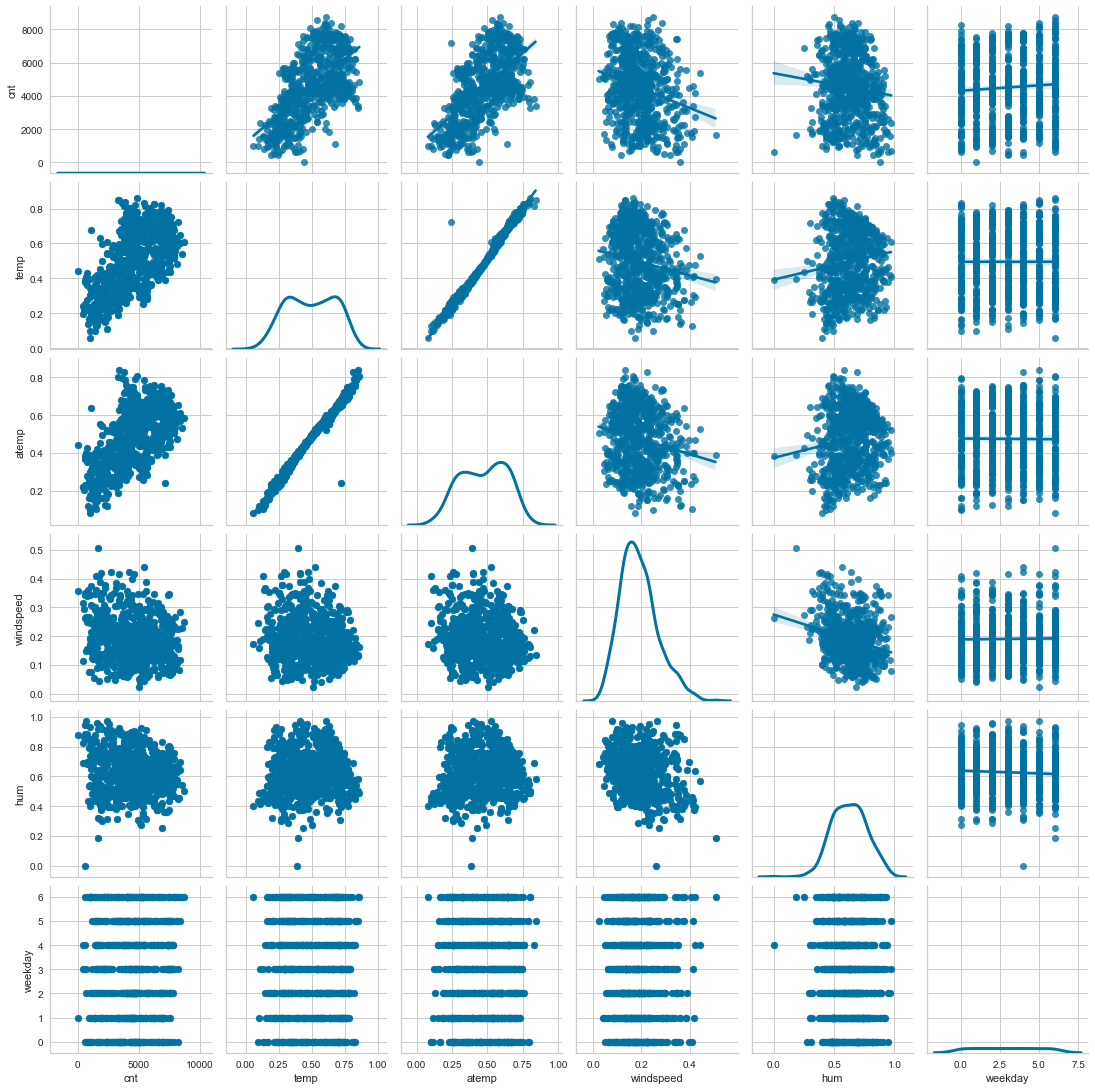

In [71]:
g = sns.PairGrid(bike_data,
                vars = ['cnt','temp','atemp','windspeed','hum','weekday'])
g.map_lower(plt.scatter)
g.map_diag(sns.kdeplot,lw=3,legend=False)
g.map_upper(sns.regplot)
plt.show()

In [73]:
bike_data_corr = bike_data[['cnt','temp','windspeed','hum']].corr()
bike_data_corr

,cnt,temp,windspeed,hum
cnt,1.000000,0.627494,-0.234545,-0.100659
temp,0.627494,1.000000,-0.157944,0.126963
windspeed,-0.234545,-0.157944,1.000000,-0.248489
hum,-0.100659,0.126963,-0.248489,1.000000


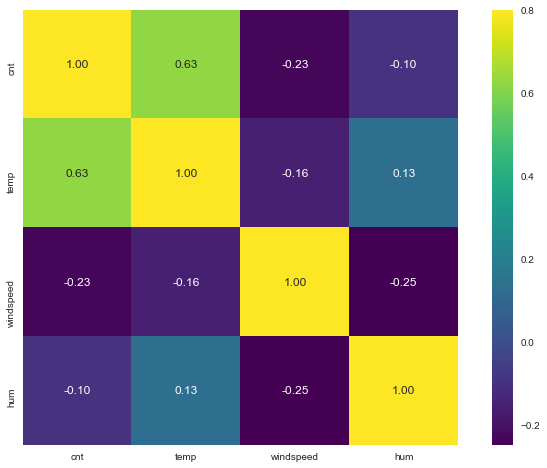

In [75]:
plt.figure(figsize=(12,8))
sns.heatmap(bike_data_corr,vmax=.8,square=True,annot=True,fmt='.2f',cmap='viridis')
plt.show()

<Figure size 1080x720 with 0 Axes>

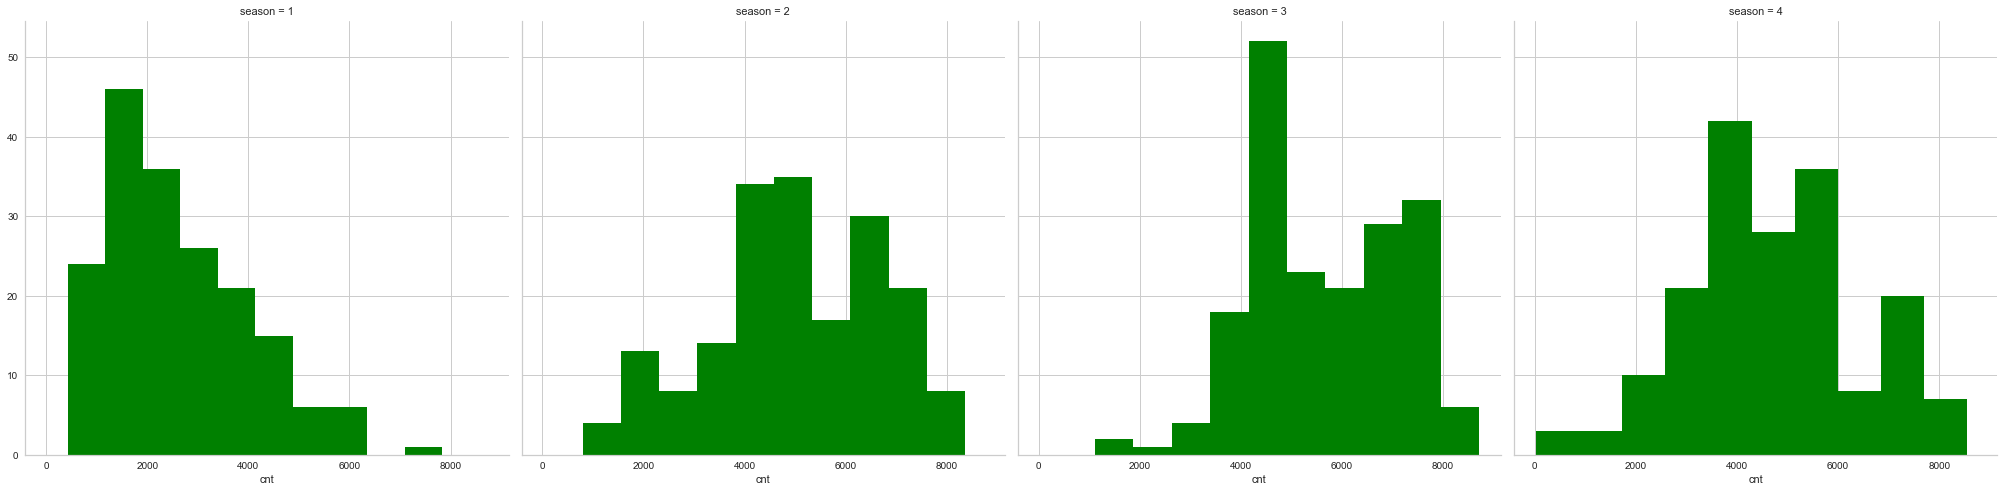

In [77]:
# facet grid = axis for each categorical column value
plt.figure(figsize=(15,10))
fg = sns.FacetGrid(bike_data,
                   col='season',
                   height=7,aspect=1)
fg.map(plt.hist,'cnt',color='green')
plt.show()